## Gram-Schmidt-Process
***

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Vector(object):
    """Comment this class"""

    def __init__(self, start, dir, color, text=None, alpha=1):
        self.start = start
        self.dir   = dir
        self.color = color
        self.text  = text
        self.alpha = alpha

        self.vect = self.vectorize()
        self.len = self.calc_length()

    def vectorize(self):
        return np.concatenate((self.start, self.dir))

    def calc_length(self):
        return np.sqrt(np.dot(self.vect, self.vect))

    def calc_endpoint(self):
        return self.start + self.dir

    def calc_midpoint(self):
        return (self.calc_endpoint() + self.start)/2

    def calc_adjacent(self, onto):
        return (
            np.dot(onto.dir, self.dir)/
            np.dot(onto.dir, onto.dir)
        ) * onto.dir

    def calc_projection(self, onto):
        adj = self.calc_adjacent(onto)[-1]
        proj = self.dir - adj
        return -proj

    def annotate(self):
        return plt.text(*self.calc_midpoint(), self.text, 
            ha="left", 
            va="center", 
            size=10,
            bbox=dict(
                boxstyle="square, pad=1", 
                fc=self.color, 
                lw=0, 
                alpha=0.3
            )
        )


class VectorCollection(object):
    """Comment this class"""

    def __init__(self, collect):
        self.collect = collect
        self.attr    = self.get_attr()
        self.params  = self.get_params()
        self.dir     = self.get_dir()

    def get_attr(self):
        return [
            a for a in dir(self.collect[0]) if 
                not a.startswith('__') and
                not callable(getattr(self.collect[0], a))
        ]

    def get_params(self):
        return {i: [getattr(j, i) for j in self.collect] for i in self.attr}

    def get_dir(self):
        return np.vstack(self.params["vect"]).T

    def annotate(self):
        for i in self.collect:
            i.annotate()

In [5]:
origin = np.array([0,0])
v_1_coord = np.array([-2, 1])
v_2_coord = np.array([3, 3])

v_1 = Vector(start=origin, dir=v_2_coord, color="blue", text='v_1', alpha=.75)
v_2 = Vector(start=origin, dir=v_1_coord, color="red", text='v_2', alpha=.75)

adj = Vector(
    start = v_2.start, 
    dir   = v_2.calc_adjacent(onto=v_1), 
    text  = "u_2",
    color = "grey", 
    alpha = 0.5
)
proj = Vector(
    start = v_2.dir, 
    dir   = v_2.calc_projection(onto=v_1), 
    color = "grey", 
    text  = "w_2",
    alpha = 0.5
)

e_1 = Vector(
    start = origin, 
    dir   = v_1.dir/v_1.len, 
    color = "orange", 
    text  = 'e_1',
    alpha = 0.8
)

e_2 = Vector(
    start = adj.dir, 
    dir   = -proj.dir/proj.len, 
    color = "orange", 
    text  = 'e_2',
    alpha = 0.8
)

e_2_orig = Vector(
    start = origin, 
    dir   = -proj.dir/proj.len, 
    color = "orange", 
    text  = 'e_2',
    alpha = 0.8
)

all_vectors = VectorCollection([v_1, v_2, adj, proj, e_1, e_2, e_2_orig])

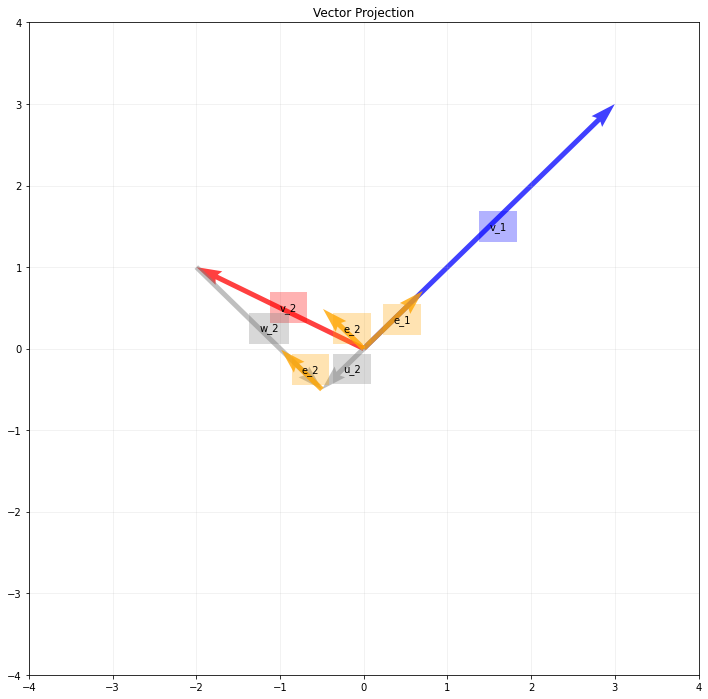

In [6]:
plt.figure(figsize=(12,12))
plt.quiver(
    *all_vectors.dir,
    color       = all_vectors.params["color"], 
    alpha       = all_vectors.params["alpha"], 
    angles      = 'xy', 
    scale_units = "xy",
    lw          = 0,
    scale       = 1
)

all_vectors.annotate()

plt.title("Vector Projection")
plt.grid(alpha=0.2)
plt.xticks(np.arange(-4, 5, 1))
plt.yticks(np.arange(-4, 5, 1))
plt.show()